In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.9/189.9 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 23.1
    Uninstalling packaging-23.1:
      Successfully uninstalled packaging-23.1
  Attempting uninstall: flax
    Found existing installation: flax 0.6.9
    Uninstalling flax-0.6.9:
      Successfully uninstalled flax-0.6.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
statsmodels 0.13.5 requires packaging>=21.3, but you have packaging 20.9 which is incompatible.
xar

In [ ]:
print (tf.__version__)

2.12.0


Import Library

In [ ]:
import os
import numpy as np
import tensorflow as tf
import tensorflowjs as tfjs
import matplotlib.pyplot as plt

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense


Pre-trained Model

In [ ]:
# Initialize pre-trained models
pre_trained_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freezes pre-trained coating weights
for layer in pre_trained_model.layers:
    layer.trainable = False

# Added a Dense layer for multiclass classification
x = Flatten()(pre_trained_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# Build the final model
model = Model(inputs=pre_trained_model.input, outputs=outputs)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
pre_trained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Set the training parameters

In [ ]:
from keras.optimizers import Adam

model.compile(optimizer = Adam(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

Prepare the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
dataset = '/content/drive/MyDrive/Colab Notebooks/dataset.zip'
zip_ref = zipfile.ZipFile(dataset, 'r')
zip_ref.extractall()
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/Colab Notebooks/dataset.zip' mode='r'>>

In [ ]:
os.listdir('dataset')

['VALIDATION', 'TESTING', 'TRAINING']

In [ ]:
# Specify the path to the dataset directory
base_dir = 'dataset'
train_dir = os.path.join(base_dir, 'TRAINING')
test_dir = os.path.join(base_dir, 'TESTING')
validation_dir = os.path.join(base_dir, 'VALIDATION')

In [ ]:
# Specify the path Train
train_organic_dir = os.path.join(train_dir, 'organic')
train_inorganic_dir = os.path.join(train_dir, 'inorganic')
train_hazardous_dir = os.path.join(train_dir, 'hazardous')

In [ ]:
# Specify the path Test
test_organic_dir = os.path.join(test_dir, 'organic')
test_inorganic_dir = os.path.join(test_dir, 'inorganic')
test_hazardous_dir = os.path.join(test_dir, 'hazardous')

In [ ]:
# Specify the path Validation
val_organic_dir = os.path.join(validation_dir, 'organic')
val_inorganic_dir = os.path.join(validation_dir, 'inorganic')
val_hazardous_dir = os.path.join(validation_dir, 'hazardous')

Preprocess the images

In [ ]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 0.2,
    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Load and process the training dataset
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['organic', 'inorganic', 'hazardous']
)

Found 12000 images belonging to 3 classes.


In [ ]:
# Load and process the testing dataset
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['organic', 'inorganic', 'hazardous']
)

Found 1500 images belonging to 3 classes.


In [ ]:
# Load and process the validation dataset
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['organic', 'inorganic', 'hazardous']
)

Found 1500 images belonging to 3 classes.


Train Model

In [ ]:
# Setting Callbacks
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') >= 0.90:
            print("\nReached 90% accuracy, so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()


In [ ]:
train = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    callbacks=[callbacks],
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/100
375/375 [==============================] - 243s 634ms/step - loss: 0.4604 - accuracy: 0.8033 - val_loss: 0.3817 - val_accuracy: 0.8451
Epoch 2/100
375/375 [==============================] - 239s 638ms/step - loss: 0.3266 - accuracy: 0.8695 - val_loss: 0.3757 - val_accuracy: 0.8533
Epoch 3/100
375/375 [==============================] - 237s 632ms/step - loss: 0.2736 - accuracy: 0.8940 - val_loss: 0.3348 - val_accuracy: 0.8764
Epoch 4/100
375/375 [==============================] - 243s 649ms/step - loss: 0.2511 - accuracy: 0.9045 - val_loss: 0.3746 - val_accuracy: 0.8648
Epoch 5/100
375/375 [==============================] - 238s 636ms/step - loss: 0.2252 - accuracy: 0.9130 - val_loss: 0.3235 - val_accuracy: 0.8838
Epoch 6/100
375/375 [==============================] - 226s 602ms/step - loss: 0.1917 - accuracy: 0.9247 - val_loss: 0.3051 - val_accuracy: 0.8899
Epoch 7/100
375/375 [==============================] - 231s 615ms/step - loss: 0.1748 - accuracy: 0.9351 - val_loss: 0

Evaluate the Model and Visualize Training Results

In [ ]:
# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(validation_generator)
print("Loss:", loss)
print("Accuracy:", accuracy)


47/47 [==============================] - 31s 657ms/step - loss: 0.2639 - accuracy: 0.9040
Loss: 0.2639472782611847
Accuracy: 0.9039999842643738


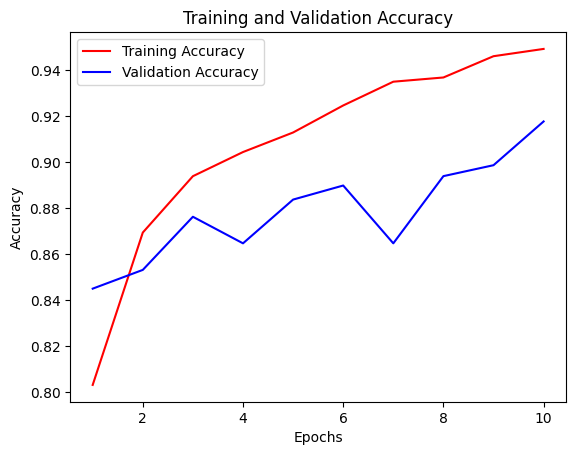

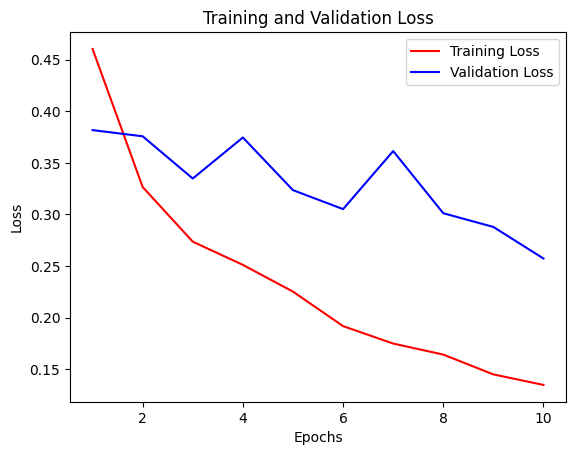

In [ ]:
# Plot accuracy and loss
epochs = range(1, len(train.history['accuracy']) + 1)

plt.plot(epochs, train.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(epochs, train.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train.history['loss'], 'r', label='Training Loss')
plt.plot(epochs, train.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Save and Load the Model

In [ ]:
# Save the model to a file
model.save('example_waste_classification_model.h5')

# Load the model from the file
loaded_model = tf.keras.models.load_model('example_waste_classification_model.h5')


Testing the model

In [ ]:
from PIL import Image
import numpy as np

# Path to the folder containing testing images
test_folder = test_dir

# List all class folders in the testing folder
class_folders = ['organic', 'inorganic', 'hazardous']

# Iterate through each class folder
for class_folder in class_folders:
    # Path to the current class folder
    class_path = os.path.join(test_folder, class_folder)

    # List all image files in the class folder
    test_images = os.listdir(class_path)

    # Iterate through each image file
    for image_file in test_images:
        # Load and preprocess the image
        image_path = os.path.join(class_path, image_file)
        image = Image.open(image_path)
        image = image.resize((224, 224))
        image = np.array(image)
        image = image / 255.0

        # Reshape the image to match the model's input shape
        image = np.expand_dims(image, axis=0)

        try:
            # Perform inference using the model
            predictions = model.predict(image)
            predicted_class = np.argmax(predictions, axis=1)[0]

            # Display the predicted class or perform further processing
            print("Predicted class for", image_file, ": ", predicted_class)
        except Exception as e:
            print("Error occurred during inference:", str(e))


1/1 [==============================] - 1s 729ms/step
Predicted class for organic (482).jpg :  1
1/1 [==============================] - 0s 25ms/step
Predicted class for organic (441).jpg :  0
1/1 [==============================] - 0s 27ms/step
Predicted class for organic (447).jpg :  0
1/1 [==============================] - 0s 19ms/step
Predicted class for organic (105).jpg :  0
1/1 [==============================] - 0s 20ms/step
Predicted class for 1226.jpg :  0
1/1 [==============================] - 0s 24ms/step
Predicted class for organic (500).jpg :  0
1/1 [==============================] - 0s 25ms/step
Predicted class for organik (32).jpg :  0
1/1 [==============================] - 0s 23ms/step
Predicted class for organic (152).jpg :  0
1/1 [==============================] - 0s 24ms/step
Predicted class for 1165.jpg :  0
1/1 [==============================] - 0s 25ms/step
Predicted class for 1164.jpg :  0
1/1 [==============================] - 0s 20ms/step
Predicted class for organ

Save and Convert to json

In [ ]:
tfjs.converters.save_keras_model(model,"/content")

In [ ]:
!ls

dataset				       group1-shard1of21.bin
drive				       group1-shard20of21.bin
example_waste_classification_model.h5  group1-shard21of21.bin
group1-shard10of21.bin		       group1-shard2of21.bin
group1-shard11of21.bin		       group1-shard3of21.bin
group1-shard12of21.bin		       group1-shard4of21.bin
group1-shard13of21.bin		       group1-shard5of21.bin
group1-shard14of21.bin		       group1-shard6of21.bin
group1-shard15of21.bin		       group1-shard7of21.bin
group1-shard16of21.bin		       group1-shard8of21.bin
group1-shard17of21.bin		       group1-shard9of21.bin
group1-shard18of21.bin		       model.json
group1-shard19of21.bin		       sample_data


In [ ]:
!waste model.json

/bin/bash: waste: command not found


In [ ]:
from google.colab import files

In [ ]:
files.download('example_waste_classification_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('model.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('group1-shard1of21.bin')
files.download('group1-shard2of21.bin')
files.download('group1-shard3of21.bin')
files.download('group1-shard4of21.bin')
files.download('group1-shard5of21.bin')
files.download('group1-shard6of21.bin')
files.download('group1-shard7of21.bin')
files.download('group1-shard8of21.bin')
files.download('group1-shard9of21.bin')
files.download('group1-shard10of21.bin')
files.download('group1-shard11of21.bin')
files.download('group1-shard12of21.bin')
files.download('group1-shard13of21.bin')
files.download('group1-shard14of21.bin')
files.download('group1-shard15of21.bin')
files.download('group1-shard16of21.bin')
files.download('group1-shard17of21.bin')
files.download('group1-shard18of21.bin')
files.download('group1-shard19of21.bin')
files.download('group1-shard20of21.bin')
files.download('group1-shard21of21.bin')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>